In [1]:
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import PIL
PIL.ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
# create data generator
train_data = ImageDataGenerator(rescale=1.0/255.0, validation_split = 0.3)

In [3]:
# prepare iterators
train_it = train_data.flow_from_directory('/home/ubuntu/sc/od', color_mode = 'rgb', seed = 123, class_mode='binary', batch_size=64, target_size=(224, 224), subset = 'training')
test_it = train_data.flow_from_directory('/home/ubuntu/sc/od', color_mode = 'rgb', seed = 123, class_mode='binary', batch_size=64, target_size=(224, 224), subset = 'validation')

Found 16380 images belonging to 2 classes.
Found 7019 images belonging to 2 classes.


In [4]:
# define cnn model
# can adjust as needed
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [8]:
def define_3layer_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
## Basic model
# block 1
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
# block 2
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
# block 3
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

If you get a PIL error about being unable to read a file, you'll need to do:
    
    find . -size 0 -type f -delete 
on the directory to get rid of any 0 byte files

If that fails, run this which will get rid of all non-jpeg image files.
    
    find . -type f -exec bash -c 'file -bi "$1" | grep -q image/jpeg || rm "$1"' none {} \;

In [9]:
# define model
model = define_3layer_model()
# fit model
history = model.fit(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=1)
# evaluate model
_, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
#print('> %.3f' % (acc * 100.0))

Epoch 1/20
256/256 [==============================] - 673s 3s/step - loss: 0.4310 - accuracy: 0.7766 - val_loss: 0.3853 - val_accuracy: 0.8134
Epoch 2/20
256/256 [==============================] - 672s 3s/step - loss: 0.3431 - accuracy: 0.8258 - val_loss: 0.4027 - val_accuracy: 0.8218
Epoch 3/20
256/256 [==============================] - 672s 3s/step - loss: 0.3181 - accuracy: 0.8415 - val_loss: 0.3806 - val_accuracy: 0.7897
Epoch 4/20
256/256 [==============================] - 672s 3s/step - loss: 0.2970 - accuracy: 0.8563 - val_loss: 0.3793 - val_accuracy: 0.7933
Epoch 5/20
256/256 [==============================] - 672s 3s/step - loss: 0.2814 - accuracy: 0.8658 - val_loss: 0.3759 - val_accuracy: 0.7988
Epoch 6/20
256/256 [==============================] - 672s 3s/step - loss: 0.2605 - accuracy: 0.8816 - val_loss: 0.3856 - val_accuracy: 0.8216
Epoch 7/20
256/256 [==============================] - 672s 3s/step - loss: 0.2412 - accuracy: 0.8912 - val_loss: 0.3909 - val_accuracy: 0.7869

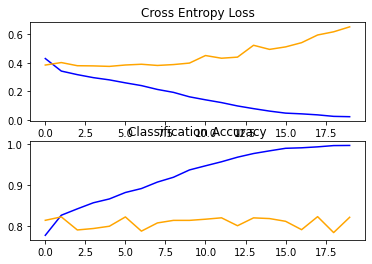

In [10]:
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
# save plot to file
#filename = sys.argv[0].split('/')[-1]
#pyplot.savefig(filename + '_plot.png')
#pyplot.close()